# Tensor Flow Intro Project: QMNIST classification

   ## <i> Gathering and Processing Data </i>

In [22]:
#import dependencies
import pickle

%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plot

import tensorflow as tf
from tensorflow import keras

In [3]:
# download the dataset from online (property of NYU)
# !wget https://nyu.box.com/shared/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl -O ./qmnist.pkl

In [4]:
# "Un-pickle" the data
qmnist = pickle.load(open("./qmnist.pkl","rb"))
x_train = qmnist['train_data']
y_train = qmnist['train_labels']

In [5]:
#nice lil print function from class
def print_data(train_data, train_labels):
    fig, axes = plot.subplots(5, 1, figsize=(6, 6))
    fig.tight_layout()

    for i in range(5):
        idx = i
        axes[i].set_title(train_labels[idx])
        axes[i].imshow(train_data[idx].reshape(28, 28), cmap='gray')
        axes[i].axis('off')

    plot.show()

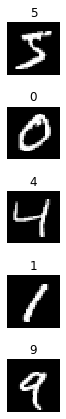

In [6]:
#sanity check: take a look at some data (each input vector is an image of a hand-drawn decimal digit)
print_data(x_train,y_train)

In [10]:
#CREATING A MODEL IN TENSOR FLOW:

#some data preprocessing (make sure your X data is between 0 and 1 by normalizing)
X_train = x_train/255.0
Y_train = y_train

#declare the model, define each layer of the neural network
deepMIND_AI = keras.Sequential([
    #input layer(size of an element of X_train)
    keras.layers.Dense(784),
    #hidden layer(could have picked any size)
    keras.layers.Dense(100,activation='relu'),
    #layer that outputs our categorical distribution
    keras.layers.Dense(10,activation='softmax')
])

#compile AKA set hyper-parameters
deepMIND_AI.compile(
    optimizer='Adam',
    #This one is what makes this train a probability distribution, and perform CLASSIFICATION on unique output classes (ints)
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#and now, just fit it to the training data
deepMIND_AI.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2267 - accuracy: 0.9313
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1368 - accuracy: 0.9594
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1150 - accuracy: 0.9657
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1052 - accuracy: 0.9694
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0903 - accuracy: 0.9734
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0876 - accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0812 - accuracy: 0.9758
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0765 - accuracy: 0.9775
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0747 - accuracy: 0.9783
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [18]:
#TESTING A MODEL IN TENSOR FLOW

#process testing data
x_test = qmnist['test_data']
y_test = qmnist['test_labels']
X_test = x_test / 255.0
Y_test = y_test

#and now test your model like this:
test_loss,test_acc = deepMIND_AI.evaluate(X_test,Y_test)


1563/1563 [==============================] - 4s 3ms/step - loss: 0.1685 - accuracy: 0.9662


### Accuracy of 0.9662!!! (Note that the sklearn neural net had accuracy of 0.962 on the TRAINING data (TensorFlow is better!!))


In [21]:
# "Vanilla" neural network with 3 hidden layers 


<class 'tensorflow.python.eager.def_function.UnliftedInitializerVariable'>
